# Discrete Distribution

Suppose we flip a fair coin, 6 times. We already have seen, flipping a coin once is a Bernoulli trial, and a number of times (including once also), gives us a binomial distribution for frequency and probability of no of heads (or tails depending on our interest) in the final combination. 

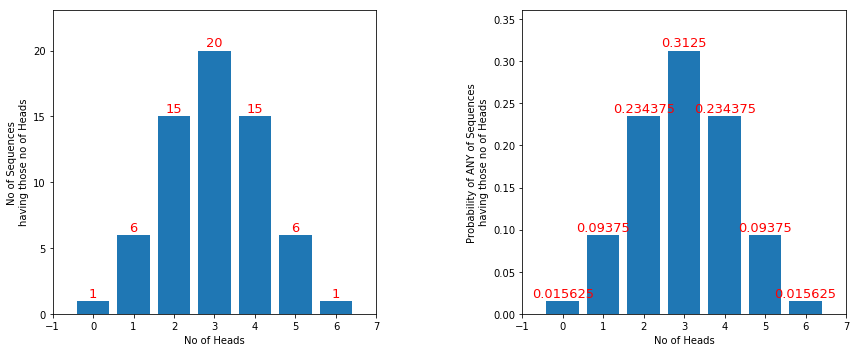

In [1]:
%matplotlib inline
import sys
sys.path.append("../../")
from coinflipviz import  get_combinations_consolidated, plot_combinations_consolidated

n_flips = 6
final_df = get_combinations_consolidated(n_flips)
plot_combinations_consolidated(final_df)

Above distributions are the theoretical frequency and probability distribution of all outcomes possible for number of flips 6. 

* From the distributions, you are already clear, if you conduct the experiment once (flipping 6 times), getting 3 heads in final outcome has the highest probability $P(X=3) = 0.3125$. 

* However, if you get 4 heads in final combination $X=4$, that has about 23% probability, it is not bad, its just next to mean. So you still have ground to believe the mean was still $X=3$.  

* And, if you get 6 heads, then it is a rare case, that is, $P(X=6) = 0.015625$ or $1.5625\%$ only. We have reason to believe that, there is something else at play. Perhaps, coin was loaded (distribution skewed to right), that getting $X=6$ was not a rarity at all. 

This is kind of basis for hypothesis testing. We could define an uneventful hypothesis and then depending on probability of outcome we had from our experiment,we either believe that Hypothesis or reject it. If you had gotten $X=3$, that has maximum probability of 31.25% of all outcomes, so we could very well accept our hypothesis that, indeed the mean is $X=3$. 

#### Alternate hypothesis: Mean has increased  

Suppose we get **$X=4$**:  

1. We would first define a **null hypothesis** $H_0: \mu = 3$ and alternate hypothesis $H_a: \mu > 3$ 
2. We would look at our experiment. Our outcome was $X = 4$. This has only $23\%$ chance out of all possibilities if null hypothesis was true. 
3. So we **cannot reject null hypothesis** that $H_0: \mu = 3$. There is **lesser evidence** that the **mean has increased**, suggesting there is not enough data to believe alternate hypothesis $H_a: \mu > 3$ 



Suppose we get **$X=6$**:  

1. We would first define a **null hypothesis** $H_0: \mu = 3$ and alternate hypothesis $H_a: \mu > 3$ 
2. We would look at our experiment. Our outcome was $X = 6$. This has only $1.5\%$ chance out of all possibilities if null hypothesis was true. 
3. So we **reject null hypothesis** that $H_0: \mu = 3$ and say, there is **stronger evidence** that the **mean has increased**, suggesting alternate hypothesis $H_a: \mu > 3$  

#### Alternate hypothesis: Mean has decreased     
  
Suppose we get $X=2$  

1. We would first define a **null hypothesis** $H_0: \mu = 3$ and alternate hypothesis $H_a: \mu < 3$ 
2. We would look at our experiment. Our outcome was $X = 2$. This has only $23\%$ chance out of all possibilities if null hypothesis was true. 
3. So we **cannot reject null hypothesis** that $H_0: \mu = 3$. There is **lesser evidence** that the **mean has decreased**, suggesting there is not enough data to believe alternate hypothesis $H_a: \mu < 3$ 


Suppose we get $X=0$  

1. We would first define a **null hypothesis** $H_0: \mu = 3$ and alternate hypothesis $H_a: \mu < 3$ 
2. We would look at our experiment. Our outcome was $X = 0$. This has again only $1.5\%$ chance out of all possibilities if null hypothesis was true. 
3. So we **reject null hypothesis** that $H_0: \mu = 3$ and say, there is stronger evidence that the **mean has decreased**, suggesting alternate hypothesis $H_a: \mu < 3$ 

#### Significance level $\alpha$

Who decides 1.5% was low enough to reject null hypothesis or 23% was high enough to avoid rejecting null hypothesis? Well, that is a standard taken by statisticians called significance level $\alpha$. Suppose we take our $\alpha = 0.05$ or 5%, then we would say, if the probability of the outcome was below $\alpha$, we reject the null hypothesis else we we will not.  

For eg, in above cases,  

* For $X=4$, $P(X=4) = 0.234$ then, $P(X=k) > \alpha$, so **cannot reject** null hypothesis $H_0: \mu = 3$
* For $X=6$, $P(X=6) = 0.015$ then, $P(X=k) < \alpha$, so **reject** null hypothesis $H_0: \mu = 3$
* For $X=2$, $P(X=2) = 0.234$ then, $P(X=k) > \alpha$, so **cannot reject** null hypothesis $H_0: \mu = 3$
* For $X=0$, $P(X=0) = 0.015$ then, $P(X=k) < \alpha$, so **reject** null hypothesis $H_0: \mu = 3$

Typically, $\alpha$ values are 0.05 (5%), 0.01 (1%), etc. and specified in the question. We had used $\alpha$ earlier in confidence intervals, for confidence level $1-\alpha$. Also note it is better to say, we cannot reject null hypothesis than accepting it.

But why did we reject or accept the hypothesis about the mean, when it was clearly $\mu=3$? The $\mu$ was the population mean and most often in reality we would not know it. The binomial distribution shown above, was a theoretical distribution for equal probability of heads and tails. In reality, it may be the case that the coin was loaded (unequal probabilities) or population distribution was skewed. And we may not take enough trials to form a normal sampling distribution which then would give us hint about population mean due to CLT. Recall, $\Big(\overline{X} \to \mu, S \to \sigma/\sqrt{n}\Big)$. We would have one sample set output, and have to take best decision out of that. This is why we **assumed** null hypothesis, even though our theoretical mean was obvious. We will assume that above binomial distribution is indeed the case, and observe probability of our outcome, given that was case. Let us consider another example, this time continous.  

# Continuous Distribution
Let X be the breaking strength of a steel bar. If the bar is manufactured by process I, X has _population_ distribution is $N(50, 36)$ and  if process II, has _population_ distribution $N(55, 36)$, a 5 units improvement. If hypothetically, we take extensive sample sets of size $n$ and plot the means, we get another set of normal sampling distributions as below, with process I having sampling distribution $N(50,36/\sqrt{n})$, and process II having sampling distribution $N(55, 36/\sqrt{n})$

In [27]:
%load_ext tikzmagic

The tikzmagic extension is already loaded. To reload it, use:
  %reload_ext tikzmagic


In [3]:
preamble = '''
    \pgfmathdeclarefunction{gauss}{3}{%
      \pgfmathparse{1/(#3*sqrt(2*pi))*exp(-((#1-#2)^2)/(2*#3^2))}%
    }
'''

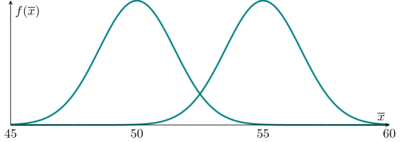

In [4]:
%%tikz -p pgfplots -x $preamble
\begin{axis}[
        no markers, 
        domain=45:60, 
        samples=100,
        ymin=0,
        axis lines*=left, 
        xlabel=$\overline{x}$,
        ylabel=$f(\overline{x})$,
        height=5cm, 
        width=12cm,
        xtick=\empty, 
        ytick=\empty,
        enlargelimits=false, 
        clip=false, 
        axis on top,
        grid = major,
        axis lines = middle
      ]
    
    \def\mean{50}
    \def\sd{1.5}
    \def\cilow{\mean - 1.96*\sd}
    \def\cihigh{\mean + 1.96*\sd}
    \def\cilowlow{\mean + 5.9 - 1.96*\sd}
    \addplot [very thick,cyan!50!black] {gauss(x, \mean, \sd)};
    \addplot [very thick,cyan!50!black] {gauss(x, \mean+5, \sd)};   

    \pgfmathsetmacro\valueA{gauss(53,\mean+5,\sd)}

    
    \node[below] at (axis cs:45, 0)  {45};
    \node[below] at (axis cs:\mean, 0)  {\mean};
    \node[below] at (axis cs:\mean+5, 0)  {55}; 
    \node[below] at (axis cs:60, 0)  {60};


   
    
\end{axis}

Let us assume null hypothesis as $H_0: \overline{X} = 50$ and alternate hypothesis as $H_a: \overline{X} = 55$. If now we take a sample set, $x = {x_1, x_2, x_3.. x_n}$, and calculate $\overline{x}$.  

* If $\overline{x} < 50$ we clearly **cannot reject** null hypothesis obviously $H_0: \overline{X} = 50$, because the probability for mean of sampling distribution to be $55$ is almost 0. 
* If $\overline{x} > 55$, we clearly **reject** null hypothesis, as probability for mean of sampling distribution to be $50$ is almost 0.  

Of course, if $\overline{x}$ nears 45 or 60, we have similar hypothesis story waiting(?!). The interesting part is to wonder, what if $50 < \overline{x} < 55$.  Note that, for $\overline{x} \geq 53$, the probability for $N(55,36)$ is higher than that for $N(50,36)$. Similarly, for $\overline{x} < 53$, the probability for $N(50,36)$ is higher. This is highlighted with respective probability area below. 

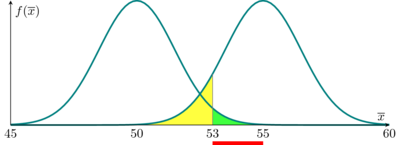

In [5]:
%%tikz -p pgfplots -x $preamble
\begin{axis}[
        no markers, 
        domain=45:60, 
        samples=100,
        ymin=0,
        axis lines*=left, 
        xlabel=$\overline{x}$,
        ylabel=$f(\overline{x})$,
        height=5cm, 
        width=12cm,
        xtick=\empty, 
        ytick=\empty,
        enlargelimits=false, 
        clip=false, 
        axis on top,
        grid = major,
        axis lines = middle
      ]
    
    \def\mean{50}
    \def\sd{1.5}
    \def\cilow{\mean - 1.96*\sd}
    \def\cihigh{\mean + 1.96*\sd}
    \def\cilowlow{\mean + 5.9 - 1.96*\sd}
    \def\mid{53}
    
    \addplot [draw=none, fill=yellow!75, domain=\cilow:\mid] {gauss(x, \mean+5, \sd)} \closedcycle;
    \addplot [draw=none, fill=green!75, domain=\mid:\cihigh+2] {gauss(x, \mean, \sd)} \closedcycle;    
    \addplot [very thick,cyan!50!black] {gauss(x, \mean, \sd)};
    \addplot [very thick,cyan!50!black] {gauss(x, \mean+5, \sd)};   
    

    \pgfmathsetmacro\valueA{gauss(\mid,\mean+5,\sd)}
    \draw [gray] (axis cs:\mid,0) -- (axis cs:\mid,\valueA); 
    \draw [line width=1mm, red, below=0.5cm] (axis cs:\mid,0) -- (axis cs:\mean+5,0);
    
    \node[below] at (axis cs:45, 0)  {45};
    \node[below] at (axis cs:\mean, 0)  {\mean};
    \node[below] at (axis cs:\mean+5, 0)  {55}; 
    \node[below] at (axis cs:60, 0)  {60};
    \node[below] at (axis cs:\mid, 0)  {\mid};  
    
\end{axis}

The rejection range for null hypothesis, which is $\overline{x} \geq 53$  is called the **critical region C** shown in red line above. Assuming null hypothesis is true, the probability for sampling set falling in critical region is called, again the significance level $\alpha$. This is highlighted in green in above diagram.  

#### Type I error:  
Think about it. We decided if $\overline{x} \geq 53$, we would reject null hypothesis $H_0:\overline{X} = 50$. However, there is still this slight probability $\alpha$, that it could still be that the $H_0$ is true. Thus, due to our decision that we reject $H_0$ when $\overline{x} \geq 53$, we have $\alpha$ chance that, the reality is still $H_0$, and thus we would be committing an error. Rejecting null hypothesis $H_0$, when in reality, its true, is called Type I error. As I said, we have $\alpha$ chance for that, thus the probability of Type I error is $\alpha$

#### Type II error:
It could happen the other way also as noted in yellow shade above. We decided if $\overline{x} < 53$ we would reject the alternate hypothesis $H_a: \overline{X} = 55$. But though less, there is still a probability shown in yellow color above, that $H_a$ could be true, and we still choose to reject it. Rejecting the alternate hypothesis $H_a$, when in reality, it is true, is called Type II error. The associated probability of doing that error, as shown in yellow, is denoted by $\beta$

#### Calculating $\alpha$ and $\beta$ for given $n$

This is when we get in to problem of calculating the associated probabilities. Let sample set size $n=16$. 

Note, $\alpha$ is given $H_0$ is true, the probability of sample mean falling in critical region, shortly noted as $P(\overline{X} > 53;H_0)$

By transforming the sampling distribution of process I to Z, we could calculate the probability $\alpha$. In other words, by calculating the Z score for $\overline{x} = 53$, we could calculate the probability $P(\overline{X} > 53; H_0)$. Note $\sigma^2 = 36 \to \sigma = 6$

$Z = \dfrac{\overline{X} - \mu}{\sigma/\sqrt{n}} = \dfrac{53 - 50}{6/\sqrt{16}}$

In [6]:
def get_zscore(x, mu, sigma, n):
    num = x - mu
    from math import sqrt
    den = sigma/sqrt(n)
    return round(num/den, 3)

z = get_zscore(53, 50, 6, 16)
print(z)

2.0


The Z score is 2. Now its easier to calculate the probability area. 

$P(\overline{X} > 53;H_0) = P(Z > 2;H_0)$

In [7]:
def get_zarea(z, tail='right'):
    from scipy import stats
    if tail == 'right':
        alpha = round(1 - stats.norm.cdf(z),4) # right tailed area
    else: # assume left tail
        alpha = round(stats.norm.cdf(z),4) # left tailed area
    return alpha

za = get_zarea(z, 'right')
print(za)

0.0228


Thus the significance level of the test with sample size 16, the probability of making Type I error, $\alpha$ is 0.0228 or 2.28%. Similarly one could calculate $\beta$ as below. Note, $\beta$ is from alternate hypothesis, so alternate sampling distribution $N(55, 36/16)$

$Z = \dfrac{\overline{X} - \mu}{\sigma/\sqrt{n}} = \dfrac{53 - 55}{6/\sqrt{16}}$

In [8]:
z = get_zscore(53, 55, 6, 16)
za = get_zarea(z,'left')
print(z, za)

-1.333 0.0913


Thus the probability of making Type II error, $\beta$ is 0.0913 or 9.13%. 

# Composite Hypothesis:  

What we saw so far was simple hypothesis test, because the alternate hypothesis was simple - $H_a: \mu = 55$. We had another process II and assumed, if not $\mu = 50$, it only could be $\mu = 55$. Often, we would have situations where we are not aware of process II or there could be more such possibilities. We could only say, if $\mu = 50$ or not (increased or decreased). In other words, instead of one alternate normal distribution N(55,36), we might have many, all with mean $\mu > 50$. So our alternate hypothesis should be $H_a: \mu > 50$. This could happen in other direction also, that the mean reduced leading to $H_a: \mu < 50$. Or we may only be interested if $\mu$ changed (suggesting $H_a:\mu \neq 50)$. If we have any such alternate hypothesis, then we would call the test as **Composite Hypothesis** because it is composed of all possible alternate normal distributions. 

Let us take one case $H_a:\mu > K$, where K is any value and analyze in detail. 

### Example 
_Assume that we have a population distribution which is normal with unknown mean μ but known variance $σ^2 = 100$. Say we are testing the simple null hypothesis $H_0: \mu = 60$ against the composite alternative hypothesis $H_1: \mu > 60$ with a sample mean X based on $n = 52$ observations. Suppose that we obtain the observed sample mean of $\overline{x} = 62.75$. Our situation is depicted below._

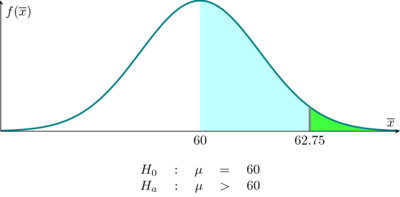

In [9]:
%%tikz -p pgfplots -x $preamble
\begin{axis}[
        no markers, 
        domain=55:65, 
        samples=100,
        ymin=0,
        axis lines*=left, 
        xlabel=$\overline{x}$,
        ylabel=$f(\overline{x})$,
        height=5cm, 
        width=12cm,
        xtick=\empty, 
        ytick=\empty,
        enlargelimits=false, 
        clip=false, 
        axis on top,
        grid = major,
        axis lines = middle
      ]
    
    \def\mean{60}
    \def\sd{1.5}
    \def\cilow{\mean - 1.96*\sd}
    \def\cihigh{\mean + 1.96*\sd}
    \def\cilowlow{\mean + 5.9 - 1.96*\sd}
    \def\mid{62.75}
    

    \addplot [draw=none, fill=green!75, domain=\mid:\cihigh+2] {gauss(x, \mean, \sd)} \closedcycle;    
    \addplot [draw=none, fill=cyan!25, domain=\mean:\mid] {gauss(x, \mean, \sd)} \closedcycle;    
    
    \addplot [very thick,cyan!50!black] {gauss(x, \mean, \sd)};


    \pgfmathsetmacro\valueA{gauss(\mid,\mean,\sd)}
    \draw [line width=0.5mm, gray] (axis cs:\mid,0) -- (axis cs:\mid,\valueA); 


    \node[below] at (axis cs:\mean, 0)  {\mean};
    \node[below] at (axis cs:\mid, 0)  {\mid};  
    

    \node[below=0.75cm,align=center,text width=8cm] at (axis cs:\mean, 0)
    {
        $H_0: \mu = 60$ \\ $H_a: \mu > 60$ \\
    };
 \end{axis}

We assume our sampling distribution is $N(60,100)$ (that is, assuming null hypothesis is true), and then wondering what is the probability of getting $\overline{x} > 62.75$. Note few things carefully. 

* We did not ask, what is $P(\overline{X} = 62.75)$ like we did in discrete distribution earlier. It is 0 for continuous anyway. 
* We did not ask, what is $P(60 < \overline{X} < 62.75)$, our sample mean is greater than assumed mean, so if we assume null hypothesis, then this is definitely a higher probability as shown in blue above, reinforcing null hypothesis again. 
* We could have done a continuity correction around $\overline{X} = 62.75$, but we need to derive more. If you recall earlier example, we said if $\overline{x} > 53$ we assume alternate hypothesis $\mu = 55$ to be true. Similarly, here, we need to define critical region, and if we get sample mean $\overline{x}$ within that, we assume alternate hypothesis to be true (thus establishing our chances to commit Type I error)

If we assume critical region to be C $\{\overline{x}: \overline{x} \geq 62.75\}$, then our probability of making Type I error is $\alpha = P(\overline{X} \geq 62.75)$. We could find that using Z score. 

$Z = \dfrac{\overline{X} - \mu}{\sigma/\sqrt{n}} = \dfrac{62.75 - 60}{10/\sqrt{52}} = 1.983$  


\begin{equation}
\begin{aligned}
    \therefore P(\overline{X} \geq 62.75) = (Z \geq 1.983) = 0.024 \label{eq:001}
\end{aligned}
\end{equation}


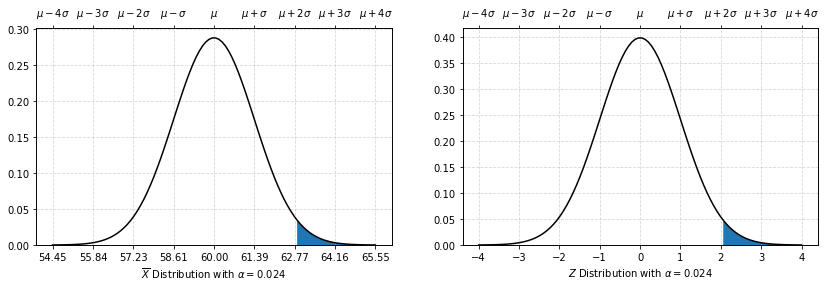

In [10]:
import matplotlib.pyplot as plt
from normalviz import draw_normal
from math import sqrt

x, mu, sigma, n = 62.75, 60, 10, 52
s = sigma/sqrt(n)   # SD of sampling distribution

# calculate z score
from scipy import stats
zs = (x - mu)/s                        # z score 
z = 1 - round(stats.norm.cdf(zs),3)    # right tailing
# print('zs: {}, p(z>zs){}'.format(zs, z))

# plot
fig, ax = plt.subplots(1,2, figsize=(14,4))
draw_normal(ax[0], mu, s, 'x>{}'.format(x))  # sampling distribution
draw_normal(ax[1], 0, 1, 'x>{}'.format(zs))        # standardized sampling distribution
ax[0].set_xlabel(r'$\overline{X}$ Distribution with $ \alpha = 0.024 $')
ax[1].set_xlabel(r'$Z$ Distribution with $ \alpha = 0.024 $')
plt.show()

So if we decide critical region, C = $\{\overline{x}: \overline{x} \geq 62.75\}$, then our $\alpha$ would be 0.024. That is, there is about 2.4% chance of making Type I error. 

Typically, the $\alpha$ is decided up front. For eg, we would say, 5% probability allowed to make Type I error for the problem at hand. This means, $\alpha = 0.05$. We could then go in reverse, to calculate the value beyond which we could declare critical region. 

$\alpha = 0.05 \implies Z_{\alpha} = 1.645$ because , $P(Z \geq 1.645) = P(Z \geq Z_{\alpha}) = 0.05$  

$\overline{X} = Z\dfrac{\sigma}{\sqrt{n}} + \mu = 1.645\Big(\dfrac{10}{\sqrt{52}}\Big) + 60 = 62.281$  

\begin{equation}
    \begin{aligned}
    P(Z \geq Z_{\alpha}) = P(\overline{X} \geq 62.281) = 0.05 \label{eq:002}
    \end{aligned}
\end{equation}

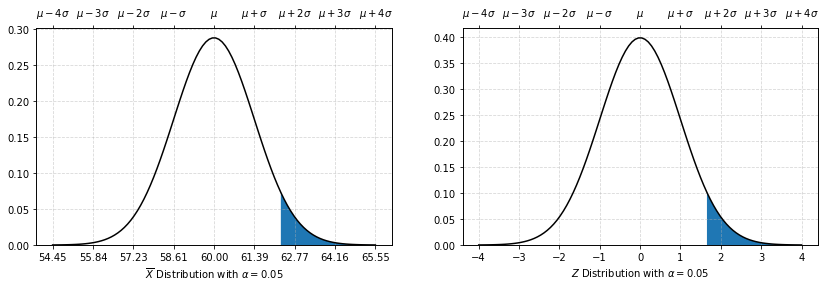

In [11]:
x = 62.281
zs = 1.645
# plot
fig, ax = plt.subplots(1,2, figsize=(14,4))
draw_normal(ax[0], mu, s, 'x>{}'.format(x))  # sampling distribution
draw_normal(ax[1], 0, 1, 'x>{}'.format(zs))        # standardized sampling distribution
ax[0].set_xlabel(r'$\overline{X}$ Distribution with $ \alpha = 0.05 $')
ax[1].set_xlabel(r'$Z$ Distribution with $ \alpha = 0.05 $')
plt.show()

Since our **given permitted $\alpha$** is 0.05, our permitted critical region C is $\overline{x}:\overline{x} \geq 62.281$. That is, if we get a sample mean $\overline{x} \geq 62.281$ we would **reject** null hypothesis and take alternate hypothesis, even when there is 5% chance of committing Type I error.  The sample mean we got was $\overline{x} = 62.75$, which had $\alpha = 0.024$. There is only a 2.4% probability that, the sample mean could be $\geq 62.75$. Since 2.4% is within the permissble range of 5%, we reject the null hypothesis $H_0:\mu=60$ and support alternate composite hypothesis $H_a:\mu>60$.  

Now how we have traversed from the notion of quoting extreme low probability for sample set for rejection to a pre determined level for rejection $\alpha$, and simply accept or reject based on if sample set probability fell within that region or not. Understandably, the $\alpha$ should be typically set by problem domain experts who have enough expertise to trade off between Type I and II errors. (Decreasing Type I probability may increase Type II probability, etc).  

By the way, the earlier $\alpha$ we got from sample set is called **p-value** to differentiate it from preset $\alpha$ 

Equations \ref{eq:001} and \ref{eq:002} could be further condensed as, if Z denotes the Z score of sample mean, 

$Z = \Big(\dfrac{\overline{X} - \mu}{\sigma/\sqrt{n}}\Big)$, then if, $Z \geq Z_{\alpha}$, **reject** null hypothesis. 

From \ref{eq:002} we could also write, 

\begin{equation}
    \begin{aligned}
        P ( Z \geq Z_{\alpha} ) = P \Bigg(\dfrac{\overline{X} - \mu}{\sigma/\sqrt{n}} \geq Z_{\alpha} \Bigg) = 0.05 \label{eq:003}
    \end{aligned}
\end{equation}

### Example

A researcher is testing the hypothesis that consuming a sports drink during exercise improves endurance. A
sample of $n = 50$ male college students is obtained and each student is given a series of three endurance tasks
and asked to consume 4 ounces of the drink during each break between tasks. The overall endurance score
for this sample is $M = 53$. For the general population of male college students, without any sports drink, the
scores for this task average $\mu = 50$  with a standard deviation of $\sigma=12$. Can the researcher conclude that endurance scores with the sports drink are significantly different than scores without the drink? Assume $\alpha = 0.05$

**Solution:**  

Given population has $\mu = 50, \sigma=12$. It is not known if its normal, but sample size $n=50$ is $>30$, so good enough to consider the resultant sampling distribution of sample means from this population to form a normal distribution $N(\mu=50,S^2 = \sigma^2/n = 12^2/50)$. Given sample set has sample mean $\overline{x} = 53$. Our null hypothesis would be $H_0: \mu = 50$. Alternate is $H_a: \mu \neq 50$. 

As first step, we will try to define a temporary critical region. Since we are interested not in $\mu$ increase, but change, it could be both $\mu$ increasing or decreasing. That is, we have to define critical region for both directions. Taking the delta $\delta = 53-50 = 3$ on left side also, we could now establish a temporary critical region 
**C**: $\{ \overline{x}:  \overline{x} \leq 47 \ \ \text{or} \ \ \overline{x} \geq 53\}$. If a new hypothetical sample mean falls within this C, we would reject null hypothesis and take alternate hypothesis. Our situation is depicted below. 

\ 


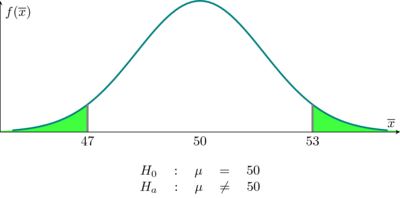

In [12]:
%%tikz -p pgfplots -x $preamble
\begin{axis}[
        no markers, 
        domain=45:55, 
        samples=100,
        ymin=0,
        axis lines*=left, 
        xlabel=$\overline{x}$,
        ylabel=$f(\overline{x})$,
        height=5cm, 
        width=12cm,
        xtick=\empty, 
        ytick=\empty,
        enlargelimits=false, 
        clip=false, 
        axis on top,
        grid = major,
        axis lines = middle
      ]
    
    \def\mean{50}
    \def\sd{1.697}
    \def\cilow{\mean - 1.96*\sd}
    \def\cihigh{\mean + 1.96*\sd}
    \def\cilowlow{\mean + 5.9 - 1.96*\sd}
    \def\midr{53}
    \def\midl{47}
    

    \addplot [draw=none, fill=green!75, domain=\midr:\cihigh+2] {gauss(x, \mean, \sd)} \closedcycle;
    \addplot [draw=none, fill=green!75, domain=\cilow-2:\midl] {gauss(x, \mean, \sd)} \closedcycle;    
    
    
    \addplot [very thick,cyan!50!black] {gauss(x, \mean, \sd)};



    \pgfmathsetmacro\valueA{gauss(\midr,\mean,\sd)}
    \pgfmathsetmacro\valueB{gauss(\midl,\mean,\sd)}
    \draw [line width=0.5mm, gray] (axis cs:\midr,0) -- (axis cs:\midr,\valueA);
    \draw [line width=0.5mm, gray] (axis cs:\midl,0) -- (axis cs:\midl,\valueB); 


    \node[below] at (axis cs:\mean, 0)  {\mean};
    \node[below] at (axis cs:\midr, 0)  {\midr};
    \node[below] at (axis cs:\midl, 0)  {\midl};  
    

    \node[below=0.75cm,align=center,text width=8cm] at (axis cs:\mean, 0)
    {
        $H_0: \mu = \mean$ \\ $H_a: \mu \neq \mean$ \\
    };
 \end{axis}

Let us transform the above assumed sample distribution (provided null hypothesis is true) to Z distribution to get the respective probabilities.  

For $\overline{x} = 53$, $Z_{53} = \dfrac{\overline{x} - \mu}{\sigma/\sqrt{n}} = \dfrac{53-50}{12/\sqrt{50}}$  
For $\overline{x} = 47$, $Z_{47} = \dfrac{\overline{x} - \mu}{\sigma/\sqrt{n}} = \dfrac{47-50}{12/\sqrt{50}}$

In [13]:
def get_Zscore_1(x_bar, mu, sig, n):
    num = x_bar - mu
    from math import sqrt
    den = sig/sqrt(n)
    return round(num/den, 4)

def get_Z_1(zs, tail='right'):
    from scipy.stats import norm
    if tail == 'left':
        return round(norm.cdf(zs),4)
    else:
        return round(1- norm.cdf(zs),4)

mu, sig, n = 50, 12, 50
zs = get_Zscore_1(53, mu, sig, n)
a1 = get_Z_1(zs,'right')
print('z_53:{}, area:{}'.format(zs,a1))
zs = get_Zscore_1(47, mu, sig, n)
a2 = get_Z_1(zs,'left')
print('z_47:{}, area:{}'.format(zs,a2))
print('Total area:{}'.format(a1+a2))

z_53:1.7678, area:0.0385
z_47:-1.7678, area:0.0385
Total area:0.077


Thus $(Z_{47},Z_{53}) = (-1.7678, 1.7678)$. The total probability area would be $P(Z \geq 1.7678) + P(Z \leq -1.7678)$. The probability area of each tail would be 0.0385, thus total area, which is _p-value_ would be 0.077

\begin{equation}
\begin{aligned}
    \therefore P(\overline{X} \geq 53 \ \ \cup \ \ \overline{X} \leq 47) 
    = P(Z \geq 1.7678 \ \ \cup \ \ Z \leq -1.7678) \nonumber \\
    = P(Z \geq 1.7678) + P(Z \leq -1.7678) \nonumber \\
    =0.0385 + 0.0385 \nonumber \\ = 0.077 \label{eq:004}
\end{aligned}
\end{equation}

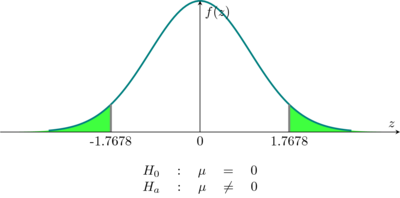

In [14]:
%%tikz -p pgfplots -x $preamble
\begin{axis}[
        no markers, 
        domain=-3:3, 
        samples=100,
        ymin=0,
        axis lines*=left, 
        xlabel=$z$,
        ylabel=$f(z)$,
        height=5cm, 
        width=12cm,
        xtick=\empty, 
        ytick=\empty,
        enlargelimits=false, 
        clip=false, 
        axis on top,
        grid = major,
        axis lines = middle
      ]
    
    \def\mean{0}
    \def\sd{1}
    \def\cilow{\mean - 1.96*\sd}
    \def\cihigh{\mean + 1.96*\sd}
    \def\cilowlow{\mean + 5.9 - 1.96*\sd}
    \def\midr{1.7678}
    \def\midl{-1.7678}
    

    \addplot [draw=none, fill=green!75, domain=\midr:\cihigh+2] {gauss(x, \mean, \sd)} \closedcycle;
    \addplot [draw=none, fill=green!75, domain=\cilow-2:\midl] {gauss(x, \mean, \sd)} \closedcycle;    
    
    
    \addplot [very thick,cyan!50!black] {gauss(x, \mean, \sd)};



    \pgfmathsetmacro\valueA{gauss(\midr,\mean,\sd)}
    \pgfmathsetmacro\valueB{gauss(\midl,\mean,\sd)}
    \draw [line width=0.5mm, gray] (axis cs:\midr,0) -- (axis cs:\midr,\valueA);
    \draw [line width=0.5mm, gray] (axis cs:\midl,0) -- (axis cs:\midl,\valueB); 


    \node[below] at (axis cs:\mean, 0)  {\mean};
    \node[below] at (axis cs:\midr, 0)  {\midr};
    \node[below] at (axis cs:\midl, 0)  {\midl};  
    

    \node[below=0.75cm,align=center,text width=8cm] at (axis cs:\mean, 0)
    {
        $H_0: \mu = \mean$ \\ $H_a: \mu \neq \mean$ \\
    };
 \end{axis}

We could straight away conclude from above finding. We are given $\alpha = 0.05$ which is the total allowed probability for making Type I error. If we select C as **C**: $\{\overline{x}:  \overline{x} \leq 47 \ \ \text{or} \ \ \overline{x} \geq 53\}$ , our probability of making Type I error would be 0.077 which is greater than allowed 0.05 limit. Thus right away, we could **fail to reject null hypothesis $H_0$**, which is same as concluding there is no significant evidence to believe there is change in the mean. 

We could also have concluded right away from Z value. Note total area allowed $\alpha = 0.05$. This means, tail end probabilities on both ends should be $0.025$, so they add up to $0.05$. We could easily find the respective Z value as $Z_{0.025} = Z_{\alpha/2} = 1.96$.  

Since $Z_{53} < Z_{\alpha/2}$, it is already evident, $Z_{53}$ occupies more probability area. Similarly, $Z_{47} > -Z_{\alpha/2}$, $Z_{47}$ is occupying more area. In simpler terms, 

$|\pm 1.7578| < |\pm 1.96| \implies |Z| < |Z_{\alpha/2}| = \Big|\dfrac{\overline{X}-\mu}{\sigma/\sqrt{n}}\Big| < |Z_{\alpha/2}|$ and we **fail to reject null hypothesis $H_0$**

Generalizing, we could write as, for two tailed situation, 

\begin{equation}
    \begin{aligned}
        P ( |Z| \geq |Z_{\alpha/2}| ) = P \Bigg(\Big|\dfrac{\overline{X} - \mu}{\sigma/\sqrt{n}}\Big| \geq |Z_{\alpha/2}| \Bigg) = 0.05 \label{eq:005} \nonumber \\
       \therefore \text{If} \ \ \ \ \Big|\dfrac{\overline{X} - \mu}{\sigma/\sqrt{n}}\Big| \geq |Z_{\alpha/2}|, \ \ \ \ \text{reject null hypothesis} \ H_0
    \end{aligned}
\end{equation}

# When $\sigma$ is unknown or small sample size

In reality, $\sigma$ is also often unknown, thus like we did in confidence intervals, we could use the student's t distribution to evaluate the hypothesis test. As before in confidence intervals, this goes without proof for now. Also when the sample size is small $n \leq 30$, we use t distribution. 

Thus, if $S$ represents sample standard deviation, the right tail example from \ref{eq:003}, becomes,

\begin{equation}
    \begin{aligned}
        P ( t \geq t_{(\alpha,n-1)} ) = P \Bigg(\dfrac{\overline{X} - \mu}{S/\sqrt{n}} \geq t_{(\alpha,n-1)} \Bigg) = 0.05 \label{eq:006}
    \end{aligned}
\end{equation}

Similary, for left and double tailed examples, we would have,

\begin{equation}
    \begin{aligned}
        P ( t \leq -t_{(\alpha,n-1)} ) = P \Bigg(\dfrac{\overline{X} - \mu}{S/\sqrt{n}} \leq -t_{(\alpha,n-1)} \Bigg) = 0.05 \nonumber \\
        P ( |t| \geq |t_{(\alpha,n-1)}| ) = P \Bigg(\Big|\dfrac{\overline{X} - \mu}{S/\sqrt{n}}\Big| \geq t_{(\alpha,n-1)} \Bigg) = 0.05 \label{eq:007}
    \end{aligned}
\end{equation}

It is not needed to remember the above formula, one could always just reason them out. Let us try a left tail example since we have not yet done that. 

### Example

_Bags of a certain brand of tortilla chips claim to have a net weight of 14 ounces. The net weights actually vary slightly from bag to bag and are normally distributed with mean µ. A representative of a consumer advocacy group wishes to see if there is any evidence that the mean net weight is less than advertised. For this, the representative randomly selects 16 bags of this brand and determines the net weight of each. He finds the sample mean to be X = 13.82 and
the sample standard deviation to be S = 0.24. Use these data to perform an appropriate test of hypothesis at 5% significance level._

**[Solution](https://www.utdallas.edu/~mbaron/3341/Practice12.pdf)**  

Given population $N(\mu = 14, \sigma^2)$. Sample set $n = 16$. Thus Sampling distribution will be $N(\mu = 14, \sigma^2/16)$  
Given Sample set has $\overline{x} = 13.82, s = 0.24$  
Given $\alpha = 0.05$  

Forget about the formula. Only thing we need to remember is, we need to use _t distribution_ because, $\sigma$ is unknown and $n < 30$. Note even if either of the case, we would still have to use _t distribution_. 

Let us start with defining critical region and thus arriving at our probability of making type I error, if we choose the critical region C to be $\{ \overline{x} : \overline{x} \leq 13.82\}$. Our situation is depicted below. The area is so small its barely visible. 

In [35]:
preamble = '''

    \pgfmathdeclarefunction{gauss}{3}{%
      \pgfmathparse{1/(#3*sqrt(2*pi))*exp(-((#1-#2)^2)/(2*#3^2))}%
    }
    
    \pgfmathdeclarefunction{gamma}{1}{%
        \pgfmathparse{2.506628274631*sqrt(1/#1)+ 0.20888568*(1/#1)^(1.5)+ 0.00870357*(1/#1)^(2.5)- (174.2106599*(1/#1)^(3.5))/25920- (715.6423511*(1/#1)^(4.5))/1244160)*exp((-ln(1/#1)-1)*#1}%
    }

    \pgfmathdeclarefunction{student}{2}{%
        \pgfmathparse{gamma((#2+1)/2.)/(sqrt(#2*pi) *gamma(#2/2.)) *((1+(#1*#1)/#2)^(-(#2+1)/2.))}%
    }

    \pgfmathdeclarefunction{student_n}{4}{%
        \pgfmathparse{student((#1 - #3)*(sqrt(#2 + 1)/#4), #2)}%
    }
'''

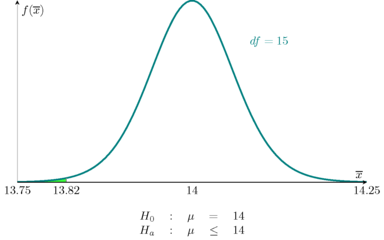

In [42]:
%%tikz -p pgfplots -x $preamble
    \begin{axis}[
            no markers, 
            domain=-13:15, 
            samples=100,
            ymin=0,
            axis lines*=left, 
            xlabel=$\overline{x}$,
            ylabel=$f(\overline{x})$,
            height=7cm, 
            width=12cm,
            xtick=\empty, 
            ytick=\empty,
            enlargelimits=false, 
            clip=false, 
            axis on top,
            grid = major,
            axis lines = middle,
            y axis line style={draw opacity=0.25}
    ]
        \def\mean{14}
        \def\sd{0.24}
        \def\df{15}
        \def\cilow{13.75}
        \def\cihigh{14.25}
        \def\midl{13.82}
        
        %\addplot [draw=none, fill=yellow!25, domain=\cilow:\cihigh] {student_n(x, \df, \mean, \sd)} \closedcycle;
        \addplot [draw=none, fill=green!75, domain=\cilow:\midl] {student_n(x, \df, \mean, \sd)} \closedcycle;  
        
        \addplot [very thick,cyan!50!black, domain=\cilow:\cihigh] {student_n(x, \df, \mean, \sd)} 
        node [pos=0.6, anchor=mid west, xshift=2em] {$df=\df$};
        
        \addplot [ycomb, gray, no markers, samples at={\midl}] {student_n(x, \df, \mean, \sd)};

        \node[below] at (axis cs:\cilow, 0)  {\cilow}; 
        \node[below] at (axis cs:\mean, 0)  {\mean}; 
        \node[below] at (axis cs:\cihigh, 0)  {\cihigh};  
        \node[below] at (axis cs:\midl, 0)  {\midl}; 
        
    \node[below=0.75cm,align=center,text width=8cm] at (axis cs:\mean, 0)
    {
        $H_0: \mu = \mean$ \\ $H_a: \mu \leq \mean$ \\
    };
 \end{axis}

**Note:** 

As per our temporary critical region, if $\overline{x} \leq 13.82$ we would say, the $\mu$ has decreased. Let us calculate the probability of committing Type I error, if we do so, which is $P(\overline{X} \leq 13.82)$. To do that, we will proceed to calculating the _t score_. 

In [45]:
def get_tscore_1(x_bar, mu, s, n):
    num = x_bar - mu
    from math import sqrt
    den = s/sqrt(n)
    return round(num/den, 4)

def get_t_1(zs, df, tail='right'):
    from scipy.stats import t
    if tail == 'left':
        return round(t.cdf(zs, df),4)
    else:
        return round(1- t.cdf(zs, df),4)

mu, s, n = 14, 0.24, 16
ts = get_tscore_1(13.82, mu, s, n)
a1 = get_t_1(ts,n-1,'left')
print('t_p:{}, area:{}'.format(ts,a1))

t_p:-3.0, area:0.0045


\begin{equation}
    \begin{aligned}
        \therefore \ \ \ \ P(\overline{X} \leq 13.82) = P(t \leq -3) = 0.0013
    \end{aligned}
\end{equation}

The standard t distribution with this area is depicted below. 

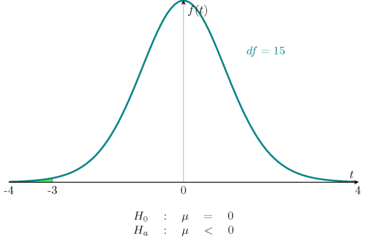

In [43]:
%%tikz -p pgfplots -x $preamble
\begin{axis}[
            no markers, 
            domain=-4:4, 
            samples=100,
            ymin=0,
            axis lines*=left, 
            xlabel=$t$,
            ylabel=$f(t)$,
            height=7cm, 
            width=12cm,
            xtick=\empty, 
            ytick=\empty,
            enlargelimits=false, 
            clip=false, 
            axis on top,
            grid = major,
            axis lines = middle,
            y axis line style={draw opacity=0.25}
    ]
        \def\mean{0}
        \def\sd{1}
        \def\df{15}
        \def\cilow{-4}
        \def\cihigh{4}
        \def\midl{-3}
        
        \addplot [draw=none, fill=green!75, domain=\cilow:\midl] {student(x, \df)} \closedcycle;  
        
        \addplot [very thick,cyan!50!black, domain=\cilow:\cihigh] {student(x, \df)} 
        node [pos=0.6, anchor=mid west, xshift=2em] {$df=\df$};
        
        \addplot [ycomb, gray, no markers, samples at={\midl}] {student(x, \df)};

        \node[below] at (axis cs:\cilow, 0)  {\cilow}; 
        \node[below] at (axis cs:\mean, 0)  {\mean}; 
        \node[below] at (axis cs:\cihigh, 0)  {\cihigh};  
        \node[below] at (axis cs:\midl, 0)  {\midl}; 
        
    \node[below=0.75cm,align=center,text width=8cm] at (axis cs:\mean, 0)
    {
        $H_0: \mu = \mean$ \\ $H_a: \mu < \mean$ \\
    };
 \end{axis}

Our probability of making a Type I error is only 0.0045 from the sample set, which is allowable under the limits of 0.05. That is, _p value_ $< \alpha$. So we could reject the null hypothesis $H_0$ and say there is significant evidence for $H_a$, or that $\mu$ has decreased. You see, we did not even find $t_{\alpha,15}$, but for the sake of sticking to formula, we could find that and conclude as well. Finding the area helps better, because area is always positive so easy to compare.

In [47]:
def get_tscore_2(sl, df, tail='left'):
    from scipy.stats import t
    if tail == 'left':
        return round(t.ppf(sl, df),4)
    else:
        return round(1- t.ppf(sl, df),4)
    
print(get_tscore_2(0.05,15,'left'))

-1.7531


Thus, $P( -3 < -1.7531)$, that is, $P( t < t_{(\alpha,15)})$, we could **reject null hypothesis**. 

Summaring for all cases,